# Prokhorov metric

The prokhorov metric can be fine-tuned on training data to better capture the geometry.
First, import the necessary tools:

In [3]:
%matplotlib widget
import gudhi as gd
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
#import ripser
import cechmate as cm
import persim
from persim import plot_diagrams
import gudhi.hera.wasserstein
from sklearn import manifold
import math

We will study three different point clouds, containing one, two and three noisy circles.
Look at the persistence diagrams below.
We would like to find the persistence diagram for the two circles to be in between one and three circles in some sense.

Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.00161)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.159)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.0145)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.00225)
Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.00245)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.383)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.11)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.0104)
Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.00107)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.133)
Constructing boundary matrix...
Finished constructing boundary matrix (El

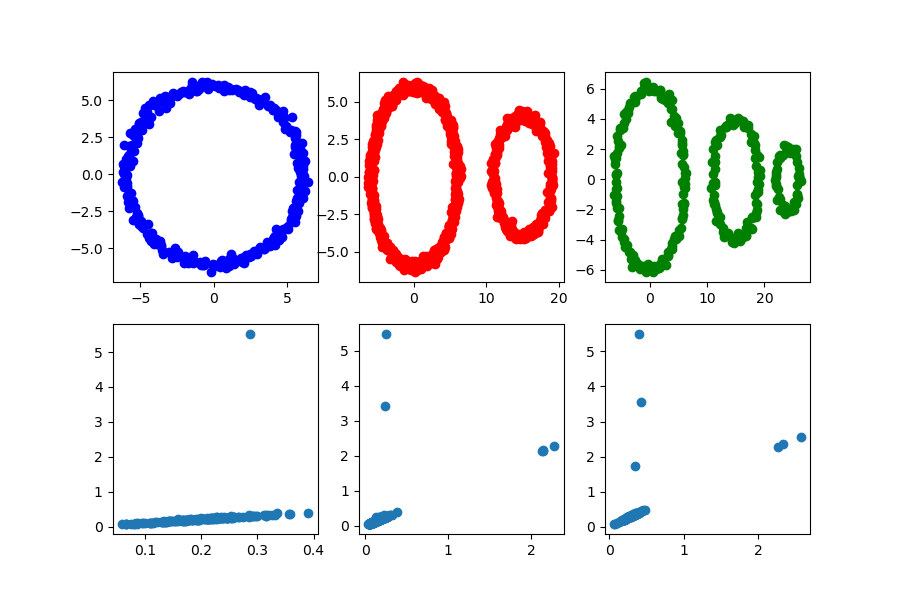

In [4]:
alpha = cm.Alpha()
t1 = np.linspace(0, 2*np.pi,300)
one_circle = np.zeros((300,2))
one_circle[:,0]=6*np.cos(t1)
one_circle[:,1]=6*np.sin(t1)

t2 = np.linspace(0, 2*np.pi,600)
two_circles = np.zeros((900,2))
two_circles[0:600,0] = 6*np.cos(t2)
two_circles[0:600,1] = 6*np.sin(t2)
t2 = np.linspace(0, 2*np.pi,300)
two_circles[600:,0] = 4*np.cos(t2)+15
two_circles[600:,1] = 4*np.sin(t2)


t3 = np.linspace(0, 2*np.pi,150)
three_circles = np.zeros((300,2))
three_circles[0:150,0] = 6*np.cos(t3)
three_circles[0:150,1] = 6*np.sin(t3)
t3 = np.linspace(0, 2*np.pi,100)
three_circles[150:250,0] = 4*np.cos(t3)+15
three_circles[150:250,1] = 4*np.sin(t3)
t3 = np.linspace(0, 2*np.pi,50)
three_circles[250:,0] = 2*np.cos(t3)+24
three_circles[250:,1] = 2*np.sin(t3)

one_circle += 0.2*np.random.randn(300,2)
two_circles += 0.2*np.random.randn(900,2)
three_circles += 0.2*np.random.randn(300,2)

fil1 = alpha.build(one_circle)
D1 = alpha.diagrams(fil1)[1]
fil2 = alpha.build(two_circles)
D2 = alpha.diagrams(fil2)[1]
fil3 = alpha.build(three_circles)
D3 = alpha.diagrams(fil3)[1]

print(gd.hera.wasserstein_distance(D1,D2,order = 1, internal_p = float("inf")))
print(gd.hera.wasserstein_distance(D2,D3,order = 1, internal_p = float("inf")))
print(gd.hera.wasserstein_distance(D1,D3,order = 1, internal_p = float("inf")))

f, ((ax1,ax3,ax5),(ax2,ax4,ax6)) = plt.subplots(2,3, figsize=(9,6))
ax1.scatter(one_circle[:,0],one_circle[:,1], color='blue')
ax3.scatter(two_circles[:,0],two_circles[:,1], color='red')
ax5.scatter(three_circles[:,0],three_circles[:,1], color='green')

ax2.scatter(D1[:,0],D1[:,1])
#ax2.axline((0,0), slope=1, ls='--', c='k')
ax4.scatter(D2[:,0],D2[:,1])
ax6.scatter(D3[:,0],D3[:,1])

plt.show()

We sample persitence diagrams as above with some random noise.
Input parameters are the sizes of the point clouds and the scale of the noise.

In [5]:
def ThreePDs(n_samples, noise):
    alpha = cm.Alpha()
    t1 = np.linspace(0, 2*np.pi,n_samples[0])
    one_circle = np.zeros((n_samples[0],2))
    one_circle[:,0]=6*np.cos(t1)
    one_circle[:,1]=6*np.sin(t1)

    t2 = np.linspace(0, 2*np.pi,(2*n_samples[1])//3)
    two_circles = np.zeros((n_samples[1],2))
    two_circles[0:(2*n_samples[1])//3,0] = 6*np.cos(t2)
    two_circles[0:(2*n_samples[1])//3,1] = 6*np.sin(t2)
    t2 = np.linspace(0, 2*np.pi,(n_samples[1])//3)
    two_circles[(2*n_samples[1])//3:,0] = 4*np.cos(t2)+15
    two_circles[(2*n_samples[1])//3:,1] = 4*np.sin(t2)

    t3 = np.linspace(0, 2*np.pi,n_samples[2]//2)
    three_circles = np.zeros((n_samples[2],2))
    three_circles[0:n_samples[2]//2,0] = 6*np.cos(t3)+15
    three_circles[0:n_samples[2]//2,1] = 6*np.sin(t3)
    t3 = np.linspace(0, 2*np.pi,n_samples[2]//3)
    three_circles[n_samples[2]//2:n_samples[2]//2+n_samples[2]//3,0] = 4*np.cos(t3)
    three_circles[n_samples[2]//2:n_samples[2]//2+n_samples[2]//3,1] = 4*np.sin(t3)
    t3 = np.linspace(0, 2*np.pi,n_samples[2]//6)
    three_circles[(5*n_samples[2])//6:,0] = 2*np.cos(t3)+24
    three_circles[(5*n_samples[2])//6:,1] = 2*np.sin(t3)

    one_circle += noise[0]*np.random.randn(n_samples[0],2)
    two_circles += noise[1]*np.random.randn(n_samples[1],2)
    three_circles += noise[2]*np.random.randn(n_samples[2],2)

    fil1 = alpha.build(one_circle)
    D1 = alpha.diagrams(fil1)[1]
    fil2 = alpha.build(two_circles)
    D2 = alpha.diagrams(fil2)[1]
    fil3 = alpha.build(three_circles)
    D3 = alpha.diagrams(fil3)[1]

    return [D1,D2,D3]

Let us sample five persistence diagrams of all three types, so fifteen in total.

In [6]:
np.random.seed(0)
n_iter = 5
pl1 = []
pl2 = []
pl3 = []
for i in range(0,n_iter):
    pds=ThreePDs([120,300,120],[0.2,0.23,0.2])
    pl1.append(pds[0])
    pl2.append(pds[1])
    pl3.append(pds[2])

persistence_list = pl1+pl2+pl3


Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.0008)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.064)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.00581)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.000857)
Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.000874)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.131)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.016)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.00222)
Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.000549)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.0497)
Constructing boundary matrix...
Finished constructing boundary matr

In [7]:
len(persistence_list)

15

Recall $D_{X,Y} = \inf\limits_{M:X\to Y} |\{d(x,M(x))>t\}|$, where $M$ ranges over all matchings.

In [8]:
def D(r_vals, t):
    return np.min(np.where(np.array(r_vals)<=t))

We are going to compute the average $D$ and display the error bars. This takes some time for big sample sizes.

In [9]:
r_vals12 = [None]*(n_iter*n_iter)
index = 0
for i in range(0,n_iter):
    for j in range(0,n_iter):
        n_points=len(persistence_list[i])+len(persistence_list[n_iter+j])
        #compute the D function
        d_vals = np.linspace(0,n_points,n_points+1)
        r_vals12[index] = [gd.prokhorov_distance(persistence_list[i], persistence_list[n_iter+j], np.array([r])) for r in d_vals]
        index = index + 1

r_vals13 = [None]*(n_iter*n_iter)
index = 0
for i in range(0,n_iter):
    for j in range(0,n_iter):
        n_points=len(persistence_list[i])+len(persistence_list[2*n_iter+j])
        #compute the D function
        d_vals = np.linspace(0,n_points,n_points+1)
        r_vals13[index] = [gd.prokhorov_distance(persistence_list[i], persistence_list[2*n_iter+j], np.array([r])) for r in d_vals]
        index = index + 1
        
r_vals23 = [None]*(n_iter*n_iter)
index = 0
for i in range(0, n_iter):
    for j in range(0,n_iter):
        n_points=len(persistence_list[n_iter+i])+len(persistence_list[2*n_iter+j])
        #compute the D function
        d_vals = np.linspace(0,n_points,n_points+1)
        r_vals23[index] = [gd.prokhorov_distance(persistence_list[n_iter+i], persistence_list[2*n_iter+j], np.array([r])) for r in d_vals]
        index = index + 1

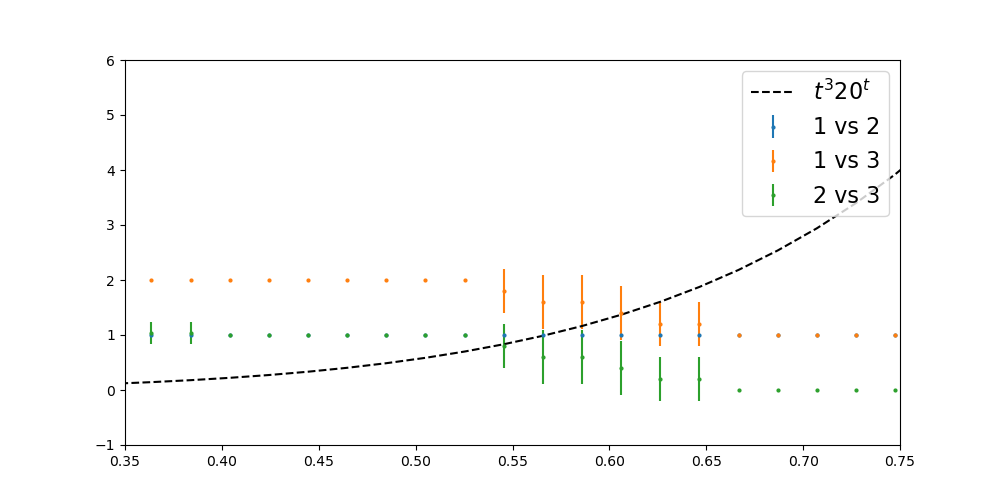

In [18]:
fig = plt.figure(figsize = (10,5))
ts = np.linspace(0,2,100)
Dmean = np.array([np.mean([D(r,t) for r in r_vals12]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals12]) for t in ts])
plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', ms = 2, label = "1 vs 2")

Dmean = np.array([np.mean([D(r,t) for r in r_vals13]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals13]) for t in ts])
plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', ms = 2, label = "1 vs 3")

Dmean = np.array([np.mean([D(r,t) for r in r_vals23]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals23]) for t in ts])
plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', ms = 2, label = "2 vs 3")

plt.plot(ts,ts**3 * 20**ts, c='k', ls='--', label="$t^3 20^t$")
#plt.plot(ts,1.7*ts, c='k', ls='--', label="$1.7t$")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right", prop={'size': 16})

#plt.gca().set_ylim((-1,40))
plt.gca().set_xlim((0.35,0.75))
plt.gca().set_ylim((-1,6))
#plt.plot(ts,np.log(141)*ts+np.log(141)/2**2*ts**2+np.log(141)/6**3*ts**3+np.log(141)/24**4*ts**4, color='grey', ls='--')

plt.show()
#plt.savefig("ThreeCirclesBPTotal.pdf")
plt.savefig("ThreeCirclesBPDetail.pdf")

In [9]:
r_vals11 = [None]*((n_iter*(n_iter+1))//2)
index = 0
for i in range(0,n_iter):
    for j in range(i,n_iter):
        n_points=len(persistence_list[i])+len(persistence_list[j])
        #compute the D function
        d_vals = np.linspace(0,n_points,n_points+1)
        r_vals11[index] = [gd.prokhorov_distance(persistence_list[i], persistence_list[j], np.array([r])) for r in d_vals]
        index = index + 1

r_vals22 = [None]*((n_iter*(n_iter+1))//2)
index = 0
for i in range(0,n_iter):
    for j in range(i,n_iter):
        n_points=len(persistence_list[n_iter+i])+len(persistence_list[n_iter+j])
        #compute the D function
        d_vals = np.linspace(0,n_points,n_points+1)
        r_vals22[index] = [gd.prokhorov_distance(persistence_list[n_iter+i], persistence_list[n_iter+j], np.array([r])) for r in d_vals]
        index = index + 1
        
r_vals33 = [None]*((n_iter*(n_iter+1))//2)
index = 0
for i in range(0, n_iter):
    for j in range(i,n_iter):
        n_points=len(persistence_list[2*n_iter+i])+len(persistence_list[2*n_iter+j])
        #compute the D function
        d_vals = np.linspace(0,n_points,n_points+1)
        r_vals33[index] = [gd.prokhorov_distance(persistence_list[2*n_iter+i], persistence_list[2*n_iter+j], np.array([r])) for r in d_vals]
        index = index + 1

In [10]:
fig = plt.figure(figsize = (10,5))
ts = np.linspace(0,0.33,100)
Dmean = np.array([np.mean([D(r,t) for r in r_vals11]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals11]) for t in ts])
plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', ms = 2, label = "1 vs 1")

Dmean = np.array([np.mean([D(r,t) for r in r_vals22]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals22]) for t in ts])
plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', ms = 2, label = "2 vs 2")

Dmean = np.array([np.mean([D(r,t) for r in r_vals33]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals33]) for t in ts])
plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', ms = 2, label = "3 vs 3")

#plt.plot(ts,141**ts - 1, c='k', ls='--')
#plt.plot(ts,np.log(141)*ts+np.log(141)/2**2*ts**2+np.log(141)/6**3*ts**3+np.log(141)/24**4*ts**4, color='grey', ls='--')
plt.plot(ts,ts**3 * 20**ts, c='k', ls='--', label="$t^3\cdot 20^t$")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")



plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
l = 3*n_iter
B1 = np.zeros((l,l))
P1 = np.zeros((l,l))
W1 = np.zeros((l,l))

base = 20
coefs = np.zeros(20)
for k in range(1,20,3):
    coefs[k] = np.log(base)**k/math.factorial(k)
#coefs=np.array([0,1.7])
print(coefs)

for i in range(l):
    for j in range(i):
        B1[i,j] = gd.bottleneck_distance(persistence_list[i], persistence_list[j])
        P1[i,j] = gd.prokhorov_distance(persistence_list[i], persistence_list[j], coefs)
        W1[i,j] = gd.hera.wasserstein_distance(persistence_list[i], persistence_list[j],order = 1, internal_p = float("inf"))
        
    

[0.00000000e+00 2.99573227e+00 0.00000000e+00 0.00000000e+00
 3.35583617e+00 0.00000000e+00 0.00000000e+00 4.29625896e-01
 0.00000000e+00 0.00000000e+00 1.60423116e-02 0.00000000e+00
 0.00000000e+00 2.51338292e-04 0.00000000e+00 0.00000000e+00
 2.01107551e-06 0.00000000e+00 0.00000000e+00 9.29955879e-09]


In [12]:
B1 = B1 + B1.transpose()
P1 = P1 + P1.transpose()
W1 = W1 + W1.transpose()

In [13]:
mds = manifold.MDS(n_components=2, max_iter=5000, eps=1e-12,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(P1).embedding_
plt.figure(figsize=(5,5))
for i in range(0,3):
    plt.scatter(pos[i*n_iter:(i+1)*n_iter,0], pos[i*n_iter:(i+1)*n_iter, 1], label="{} features".format(i+1))
    #plt.scatter(pos[i*n_iter:(i+1)*n_iter,0], [0]*5, label="{} features".format(i+1))
    
#plt.gca().set_xlim((-0.2,0.2))
plt.gca().set_aspect('equal', adjustable='box')

#plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3)
plt.xlabel("MDS from Prokhorov")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
mds = manifold.MDS(n_components=2, max_iter=5000, eps=1e-12,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(B1).embedding_
plt.figure(figsize=(5,5))
for i in range(0,3):
    plt.scatter(pos[i*n_iter:(i+1)*n_iter,0], pos[i*n_iter:(i+1)*n_iter, 1], label="{} features".format(i+1))
    #plt.scatter(pos[i*n_iter:(i+1)*n_iter,0], [0]*5 , label="{} features".format(i+1))

plt.gca().set_aspect('equal', adjustable='box')
#plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3)
plt.xlabel("MDS from Bottleneck")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
mds = manifold.MDS(n_components=2, max_iter=5000, eps=1e-12,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(W1).embedding_
plt.figure(figsize=(5,5))
for i in range(0,3):
    #plt.scatter(pos[i*n_iter:(i+1)*n_iter,0], [0]*5, label="{} features".format(i+1))
    plt.scatter(pos[i*n_iter:(i+1)*n_iter,0], pos[i*n_iter:(i+1)*n_iter, 1], label="{} features".format(i+1))

plt.gca().set_aspect('equal', adjustable='box')    
#plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3)
plt.xlabel("MDS from Wasserstein")

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(9,3))

ax1.matshow(B1)
ax1.set_title("Bottleneck")
ax2.matshow(P1)
ax2.set_title("Prokhorov")
ax3.matshow(W1)
ax3.set_title("Wasserstein")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …